# Callcenter calls

Om de verloven van het personeel van een call center te plannen wil men het aantal calls van de volgende 3 maand voorspellen aan de hand van Seasonal Decomposition Forecasting. Het aantal calls per maand vind je terug in het bestand `calls4jaar.csv` (oude examenvraag)

In [11]:
import pandas as pd
import numpy as np

alls4jaar = pd.read_csv('data/calls4jaar.csv', sep=';')

display(alls4jaar)

,Jaar,Maand,AantalCalls
0,1,1,12808
1,1,2,13668
2,1,3,14087
3,1,4,7497
4,1,5,10716
5,1,6,8805
6,1,7,1783
7,1,8,2223
8,1,9,6320
9,1,10,4122


a) Bekijk met autocorrelatie wat de periode van de seizoen component is. Wat is de periode? Vergeet niet dat je daarvoor float-waarden moet hebben. Misschien moet je het aantal lags ook vergroten.

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf

def find_period(y: np.array, maxlags=10, top_n=1) -> int:
    acf_vals = acf(y, nlags=maxlags)
    return (np.argsort(-1 * acf_vals)[1:top_n+1])

# Voorbeeldgegevens
opbrengsten = alls4jaar['AantalCalls']

# Seizoensontbinding
sd_model = seasonal_decompose(opbrengsten, model='multiplicative', period=4)
# sd_model.trend
# sd_model.seasonal
# sd_model.resid

# Autocorrelatie van seizoenscomponent
periods = find_period(sd_model.seasonal, maxlags=8, top_n=1)
print(periods) # [4]

[4]


b) Hoe groot is de autocorrelatie voor deze periode?

In [14]:
# ACF van seizoenscomponent
acf_vals = acf(sd_model.seasonal, nlags=8)

# Autocorrelatie op periode van 4 maanden
lag = periods[0]
autocorr = acf_vals[lag]
print("Autocorrelatie op periode van 4 maanden: ", autocorr)

Autocorrelatie op periode van 4 maanden:  0.9166666666666665


c) Gaan we het additief of multiplicatief model gebruiken? Maak een grafiek van het aantal calls.

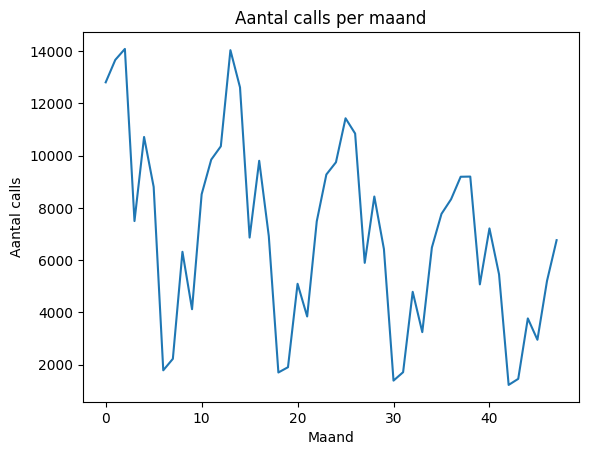

In [15]:
import matplotlib.pyplot as plt

# Voorbeeldgegevens
opbrengsten = alls4jaar['AantalCalls']

# Grafiek van aantal oproepen
plt.plot(opbrengsten)
plt.title("Aantal calls per maand")
plt.xlabel("Maand")
plt.ylabel("Aantal calls")
plt.show()

d) Als we de trend benaderen door een rechte, wat is de waarde van de slope (richtingscoëfficient)?

In [16]:
from sklearn.linear_model import LinearRegression

# Maak een numpy array met de tijd
tijd = np.arange(len(opbrengsten)).reshape(-1, 1)

# Maak een instantie van de lineaire regressor
regressor = LinearRegression()

# Pas de regressor toe op de tijdreeks data
regressor.fit(tijd, opbrengsten)

# De richtingscoëfficiënt van de lijn is de slope
slope = regressor.coef_[0]

# Print de waarde van de slope
print("Slope (richtingscoëfficiënt): ", slope)

Slope (richtingscoëfficiënt):  -109.47123317412073


e) Geef de voorspelling voor de volgende 2 maand en maak ook een grafiek.

C:\Users\elias\Downloads\DataScience1\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\elias\Downloads\DataScience1\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


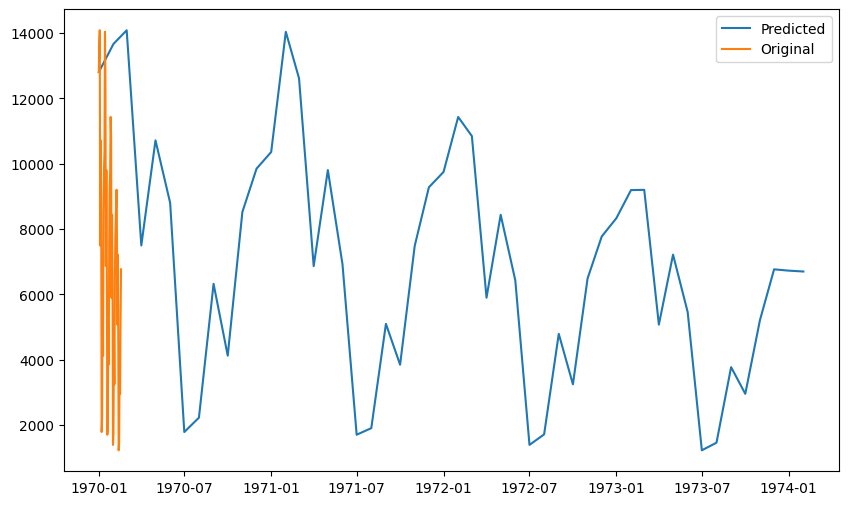

In [34]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(opbrengsten, order=(1, 1, 1))
result = model.fit()

# Forecast next 2 periods
forecast = result.forecast(steps=2)

# Create index for new forecast values
new_index = pd.date_range(start='2023-05-01', periods=2, freq='MS')

# Combine original and forecasted values into one DataFrame
preds = pd.DataFrame({'AantalCalls': np.concatenate((opbrengsten, forecast))}, index=pd.date_range(start=opbrengsten.index[0], periods=len(opbrengsten) + 2, freq='MS'))

# Plot original data and predicted values
plt.figure(figsize=(10, 6))
plt.plot(preds.index, preds.AantalCalls, label='Predicted')
plt.plot(opbrengsten.index, opbrengsten, label='Original')
plt.legend()
plt.show()

f) Geef de waarde van de MAPE voor het model.

In [36]:
def mape(actual, predicted):
    n = len(actual)
    mape = (1 / n) * sum(abs((actual - predicted) / actual)) * 100
    return mape

# Bereken de MAPE voor de voorspelling
mape_value = mape(opbrengsten[-2:], forecast)

# Print de waarde van de MAPE
print("MAPE: ", mape_value)

MAPE:  nan
